In [23]:
# Import the necessary libraries
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# Load the data
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [25]:
# Split and normalize the data
# Dividing by 255.0 normalizes the data to the range [0, 1]
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = to_categorical(y_train_full[:5000]), to_categorical(y_train_full[5000:])

# Define the classes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [26]:
# Define the neural network model
model = Sequential([
    # Flatten the 28x28 Images into a 1D array
    Flatten(input_shape=(28, 28)),
    # Adds a dense hidden layer with 128 neurons and relu activation
    Dense(128, activation='relu'),
    # Adds a dense hidden layer with 64 neurons and relu activation
    Dense(64, activation='relu'),
    # Adds a dense output layer with 10 neurons and softmax activation
    Dense(10, activation='softmax')
])


d:\Koding\Skule\5-Semester\Machine-Learning-Assignment-3\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
# Info about the model
model.summary()

# Show the weights and biases of the first hidden layer
weights, biases = model.layers[1].get_weights()

print(f"Weights: {weights}")

print(f"Weights shape: {weights.shape}")

print(f"Biases: {biases}")

print(f"Biases shape: {biases.shape}")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Weights: [[ 0.0009047  -0.05342782  0.02654365 ... -0.00675999 -0.00897821
   0.07676671]
 [-0.08069731  0.07988063  0.06640609 ... -0.01957827 -0.02474753
   0.04221328]
 [-0.05206858  0.0093438   0.04592546 ...  0.00903114 -0.00953556
   0.00327523]
 ...
 [ 0.04561079  0.03603671  0.07444047 ... -0.07280563 -0.01532996
  -0.04818462]
 [-0.03453553 -0.00094893  0.00287572 ... -0.07653217 -0.0223309
  -0.05412628]
 [-0.0004084  -0.08017251 -0.05739652 ...  0.06976918  0.02134668
   0.01229374]]
Weights shape: (784, 128)
Biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Biases shape: (128,)


In [28]:
# Compile the model
model.compile(
    # Use the categorical crossentropy loss function
    loss='categorical_crossentropy',
    # Use the sgd optimizer
    optimizer='sgd',
    # Use accuracy as the performance metric
    metrics=['accuracy']
)

In [29]:
# Training and evaluating the model
history = model.fit(
    x_train, y_train,
    epochs=30,
    validation_data=(x_valid, y_valid)
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.6602 - loss: 1.0663 - val_accuracy: 0.8162 - val_loss: 0.5450
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.8160 - loss: 0.5273 - val_accuracy: 0.8440 - val_loss: 0.4648
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.8353 - loss: 0.4670 - val_accuracy: 0.8488 - val_loss: 0.4383
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.8465 - loss: 0.4344 - val_accuracy: 0.8614 - val_loss: 0.4099
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.8540 - loss: 0.4169 - val_accuracy: 0.8646 - val_loss: 0.3954
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - accuracy: 0.8570 - loss: 0.4004 - val_accuracy: 0.8716 - val_loss: 0.3815
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.8633 - loss: 0.3816 - val_accuracy: 0.8706 - val_loss: 0.3838
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.8685 -

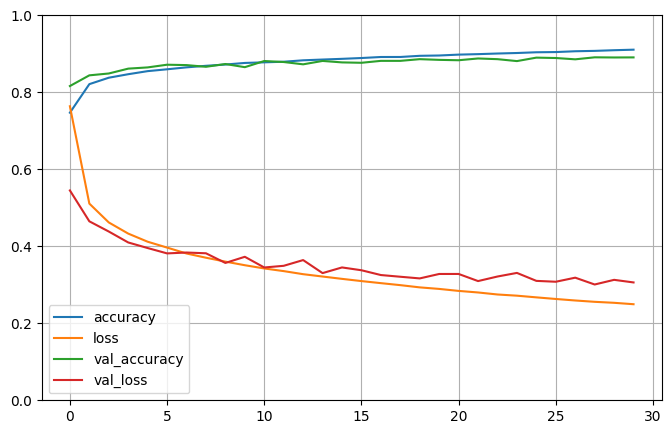

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.8775 - loss: 0.3447
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


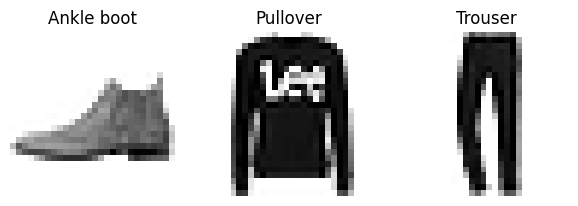

In [ ]:
model.evaluate(x_test / 255.0, to_categorical(y_test))

# Predict the class of the first 3 test images
y_pred = model.predict(x_test[:3] / 255.0)

# Print the predicted class for the first 3 test images
print(np.argmax(y_pred, axis=1))
# Print the predicted class name
print(np.array(class_names)[np.argmax(y_pred, axis=1)])

# Print the actual class for the first 3 test images
print(y_test[:3])
# Print the actual class name
print(np.array(class_names)[y_test[:3]])

# Print the images of the first 3 test images
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.show()